<center>
    <font size="5"> Zaawansowane Metody Sztucznej Inteligencji<br/>
        <small><em>Studia niestacjonarne II stopnia 2024/2025</em><br/>Kierunek: Informatyka<br>
    </font>
</center>
<br>



Agnieszka Sosin, nr indeksu: 11820

# Laboratorium nr 6: Sieć Hopfielda
zapoznaj się z treścią artykułu:

Radosław Marusik: <i>Metody uczenia sieci neuronowej Hopfielda</i>

## Import bibliotek

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
print('Numpy version:', np.__version__)
print('Tensorflow version:', tf.__version__)

Numpy version: 1.26.4
Tensorflow version: 2.17.1


## Sieć Hopfielda
Zaimplementuj architekturę sieci Hopfielda wraz z algorytmem pseudoinwersji dla ustalania wartości wag (bazując na załączonym artykule).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
print('Numpy version:', np.__version__)
print('Tensorflow version:', tf.__version__)
class Hopfield():
    def __init__(self, n):
        #inicjalizacja wag
        self.n = n
        self.W = np.zeros((n,n))

    def predict(self, x, maxiter=10000, maxiter2=100):
        self.iter = 0
        y = x.copy()
        for j in range(maxiter):
            for i in range(self.n):
                xp = y.copy()
                self.iter+=1
                y[i] = np.sign(np.dot(self.W[i], y))
            if np.all(y == xp):
                break
        return y

    def train_pseudo_inv(self, X):
        # adaptacja wag metodą pseudo inwersji
        for x in X:
            x = x.reshape((1,-1))
            #####################################################
            #uzupełnij formułę iteracyjną z artykułu
            self.W += (((self.W @ x.T) - x.T) @ ((self.W @ x.T)-x.T).T)/((x @ x.T) - (x @ (self.W @ x.T)))#TODO

Numpy version: 1.26.4
Tensorflow version: 2.17.1


Zastosowanie:

Kod 1 typowo znajduje zastosowanie, gdy
𝑊
W ma być wyliczone raz dla pełnego zbioru danych.
Kod 2 jest stosowany w algorytmach iteracyjnych lub online learning, gdzie
𝑊
W jest aktualizowane na bieżąco przy napływie nowych danych.

Jest jeszcze taka opcja:
Wx = self.W @ x
self.W += np.outer(Wx - x, Wx - x) / (x.T @ x - x.T @ Wx)


## Przygotowanie danych uczących (wzorców).
Uzupełnij

In [ ]:
# prompt: wygeneruj pattern_data dla powyższego kodu. założenia: cyfry 5x7 pikseli, pattern data to słownik postaci: {"0":[numpy array],"1":[]....}.

pattern_data = {
    "0": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]
    ]),
    "1": np.array([
        [0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0]
    ]),
    "2": np.array([
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 1, 1, 1]
    ]),
    "3": np.array([
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]
    ]),
    "4": np.array([
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1]
    ]),
    "5": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]
    ]),
    "6": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]
    ]),
    "7": np.array([
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]
    ]),
    "8": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]
    ]),
    "9": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]
    ])
}

In [ ]:
def plot_images(images, no_r=2, no_c=5, figsize=(4,4)):
    fig = plt.figure(figsize=figsize)
    images = np.array(images).reshape(-1, 7, 5)
    for i in range(no_r):
        for j in range(no_c):
            ax = fig.add_subplot(no_r, no_c, no_c * i + (j + 1))
            ax.matshow(1-images[no_c * i + j], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show

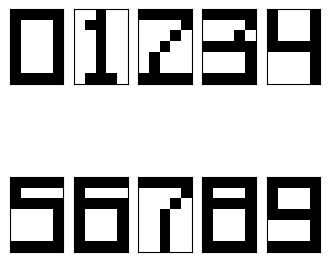

In [ ]:
train_data = [np.array(d) for d in pattern_data.values()]
plot_images(train_data, no_r=2, no_c=5)
# plt.imshow(np.array(train_data)[0].reshape(7, 5))

## Trenowanie
Utwórz instancje sieci Hipfielda i wytrenuj każdą z nich inną metodą adaptacji wag.

In [ ]:
hop = Hopfield(35)

In [ ]:
hop.W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train_data2 = np.array(train_data)
#zera zmieniane na -1, lepiej się wtedy działa
train_data2 = np.where(train_data2==0, -1, train_data2)
train_data2.shape

(10, 7, 5)

In [ ]:
hop.train_pseudo_inv(train_data2)

In [ ]:
hop.W

array([[ 0.13106549,  0.07510294,  0.00076101, ...,  0.00076101,
        -0.07535661,  0.05494787],
       [ 0.07510294,  0.27292372,  0.14437615, ...,  0.14437615,
         0.01228423, -0.05698898],
       [ 0.00076101,  0.14437615,  0.18874208, ...,  0.18874208,
         0.12604316, -0.0619379 ],
       ...,
       [ 0.00076101,  0.14437615,  0.18874208, ...,  0.18874208,
         0.12604316, -0.0619379 ],
       [-0.07535661,  0.01228423,  0.12604316, ...,  0.12604316,
         0.27903471,  0.07763494],
       [ 0.05494787, -0.05698898, -0.0619379 , ..., -0.0619379 ,
         0.07763494,  0.19452072]])

## Testowanie
Przygotuj przykłady testowe (np. takie jak w pdf'ie) i zaprezentuj wyniki.

In [ ]:
# prompt: zaszum wartości z pattern_data, użyj postaci: test = np.array([[#TODO]])

test = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1, 1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1]])

([], [])

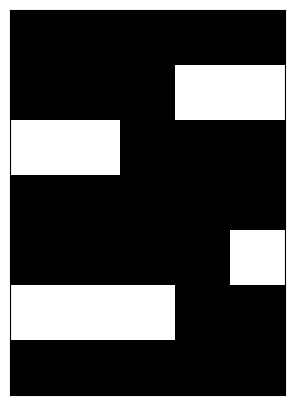

In [ ]:
fig = plt.figure(figsize=(4,5))
ax = fig.add_subplot(1, 1, 1)
ax.matshow(1-test[0].reshape(7, 5), cmap="gray")
plt.xticks(np.array([]))
plt.yticks(np.array([]))

In [ ]:
y = hop.predict(np.where(test[0]==0, -1, test[0]))
y

array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1])

([], [])

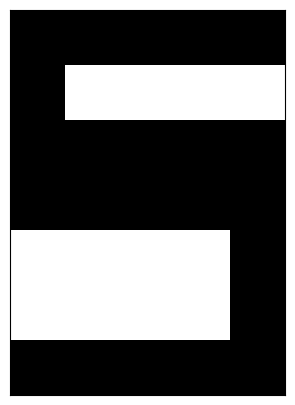

In [ ]:
fig = plt.figure(figsize=(4,5))
ax = fig.add_subplot(1, 1, 1)
ax.matshow(1-np.where(y.reshape(7, 5)==-1,0,1), cmap="gray")
plt.xticks(np.array([]))
plt.yticks(np.array([]))

## Odszumianie danych
Przygotuj kod zaszumiający wzorce uczące, mutacja piksela z ustalonym prawdopodobieństwem. Przeprowadź eksperymenty pokazujące zdolność sieci Hopfielda od odszumiania danych.


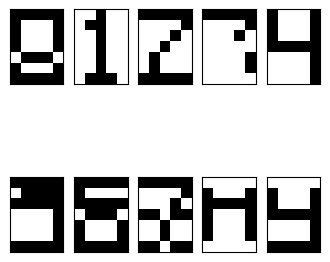

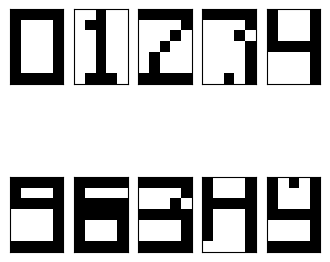

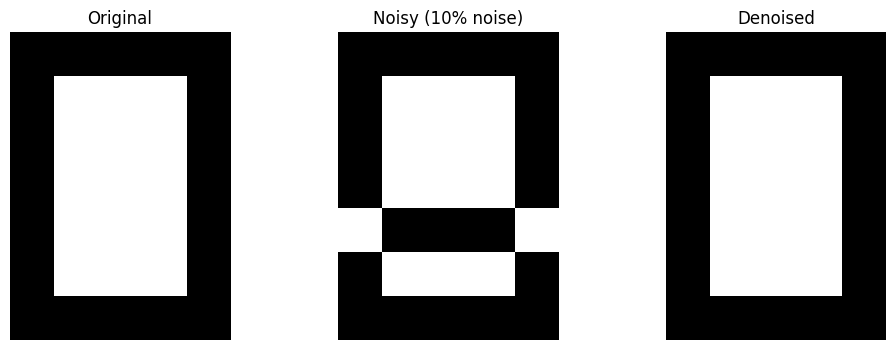

In [ ]:
# prompt: przygotuj mi teraz odszumianie -mutacja pixela. Przeprowadź eksperyment do odszumiania

import numpy as np
import matplotlib.pyplot as plt

# ... (previous code) ...

# ## Odszumianie danych
# Przygotuj kod zaszumiający wzorce uczące, mutacja piksela z ustalonym prawdopodobieństwem.
# Przeprowadź eksperymenty pokazujące zdolność sieci Hopfielda od odszumiania danych.

def add_noise(pattern, noise_probability):
    noisy_pattern = pattern.copy()
    for i in range(len(noisy_pattern)):
        if np.random.rand() < noise_probability:
            noisy_pattern[i] = -noisy_pattern[i] # Flip the pixel value
    return noisy_pattern


noise_probability = 0.1  # Probability of pixel mutation

noisy_patterns = []
for pattern in train_data2:
    noisy_pattern = add_noise(pattern, noise_probability)
    noisy_patterns.append(noisy_pattern)

# Display noisy patterns
plot_images(noisy_patterns, no_r=2, no_c=5)

# Test the Hopfield network with noisy input
denoised_patterns = []
for noisy_pattern in noisy_patterns:
    # Flatten the noisy pattern
    flattened_pattern = noisy_pattern.flatten()  # Convert to 1D array
    denoised_pattern = hop.predict(flattened_pattern)
    denoised_patterns.append(denoised_pattern)

# Display denoised patterns
plot_images(denoised_patterns, no_r=2, no_c=5)


# Compare original, noisy, and denoised patterns for a specific digit (e.g., the first one)
digit_index = 0
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(1 - train_data2[digit_index].reshape(7, 5), cmap="gray")
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(1 - noisy_patterns[digit_index].reshape(7, 5), cmap="gray")
axes[1].set_title(f"Noisy ({int(noise_probability * 100)}% noise)")
axes[1].axis('off')

axes[2].imshow(1 - np.where(denoised_patterns[digit_index].reshape(7, 5) == -1, 0, 1), cmap="gray")
axes[2].set_title("Denoised")
axes[2].axis('off')

plt.show()

##implementacja sieci Hopfielda obejmuje kilka kluczowych elementów:

pseudoinverse_learning(): Metoda uczenia sieci wykorzystująca algorytm pseudoinwersji do ustalania wartości wag. Kluczowe kroki:

Normalizacja wzorców do wartości {-1, 1}
Obliczenie macierzy pseudoodwrotnej Moore'a-Penrose'a
Wyzerowanie diagonali wag (brak połączeń neuronów ze sobą)

update_synchroniczny(): Równoczesna aktualizacja wszystkich neuronów

Przygotuj klasę relizującą sieć Hopfielda wykorzystując dowolny LLM.


In [ ]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
        self.weights = np.zeros((n_neurons, n_neurons))

    def pseudoinverse_learning(self, patterns):
        """
        Metoda uczenia z użyciem pseudoinwersji

        Args:
            patterns (np.ndarray): Wzorce treningowe
        """
        # Normalizacja wzorców do wartości {-1, 1}
        patterns = np.array(patterns)  # Upewniamy się, że wzorce są w formie numpy array
        patterns = np.where(patterns == 0, -1, patterns)  # Zmieniamy 0 na -1

        # Reshape patterns to 2D for pseudoinverse calculation
        flattened_patterns = patterns.reshape(patterns.shape[0], -1)

        # Transpozycja wzorców przed pseudoinwersją
        patterns_T = flattened_patterns.T  # Transponujemy wzorce

        # Obliczenie pseudoinwersji
        pseudo_inv = np.linalg.pinv(flattened_patterns @ patterns_T)  # Pseudoinwersja

        # Obliczenie wag
        self.weights = patterns_T @ pseudo_inv @ flattened_patterns  # Obliczanie wag

        # Wyzerowanie diagonali (brak połączeń neuronów ze sobą)
        np.fill_diagonal(self.weights, 0)  # Ustawiamy wszystkie elementy na przekątnej na 0


    def update_synchroniczny(self, stan_poczatkowy, max_iteracji=10):
        """Synchroniczna rekonstrukcja wzorca"""
        stan = stan_poczatkowy.copy()
        # Flatten the state before entering the loop
        stan = stan.flatten()  # Convert to 1D array

        for _ in range(max_iteracji):
            stan_poprzedni = stan.copy()
            # Obliczamy potencjał dla wszystkich neuronów
            potencjaly = np.dot(stan, self.weights)

            # Aktualizujemy stany neuronów na podstawie potencjałów
            stan = np.where(potencjaly >= 0, 1, -1)

            # Sprawdzamy, czy sieć osiągnęła stabilny stan
            if np.array_equal(stan, stan_poprzedni):
                break

        return stan.reshape(stan_poczatkowy.shape) # Reshape back to the original shape


In [ ]:
def prepare_digit_patterns(pattern_data):
    """Przygotowanie wzorców cyfr"""
    patterns = []
    labels = []

    for digit, pattern in pattern_data.items():
        # Zamiana {0,1} na {-1,1}
        converted_pattern = np.where(np.array(pattern) > 0, 1, -1)
        patterns.append(converted_pattern)
        labels.append(digit)

    return np.array(patterns), labels

In [ ]:
# Przygotowanie wzorców
patterns, labels = prepare_digit_patterns(pattern_data)

# Inicjalizacja sieci
network = HopfieldNetwork(len(patterns[0]))

# Uczenie sieci
network.pseudoinverse_learning(patterns)

Testowanie sieci Hopfielda dla cyfr:


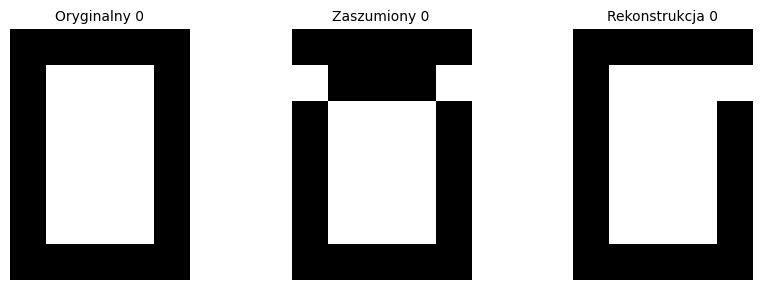

Cyfra 0: Podobieństwo rekonstrukcji = 97.14%
----------------------------------------


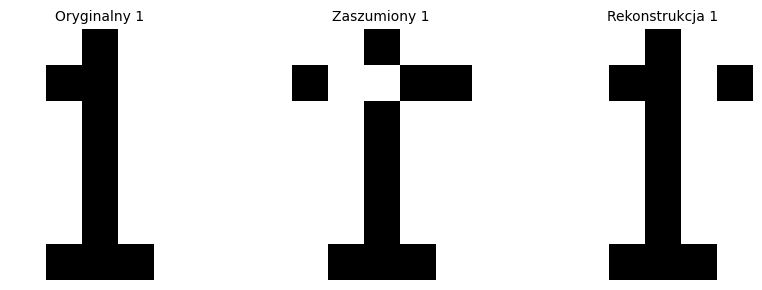

Cyfra 1: Podobieństwo rekonstrukcji = 97.14%
----------------------------------------


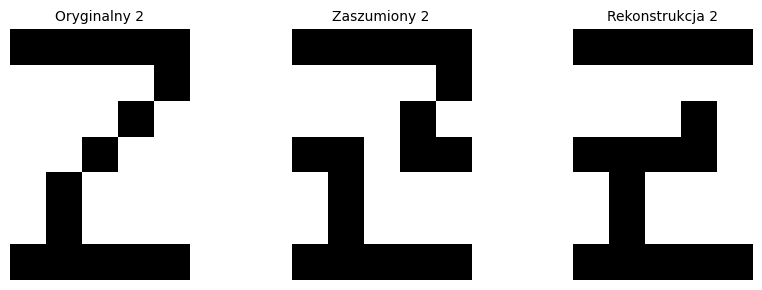

Cyfra 2: Podobieństwo rekonstrukcji = 88.57%
----------------------------------------


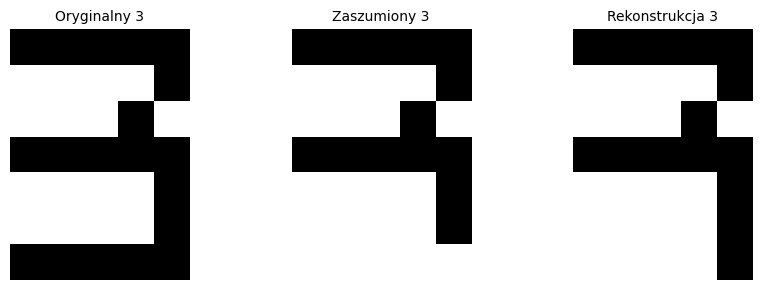

Cyfra 3: Podobieństwo rekonstrukcji = 88.57%
----------------------------------------


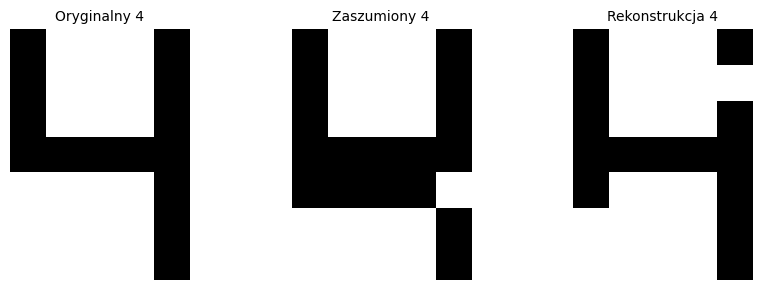

Cyfra 4: Podobieństwo rekonstrukcji = 94.29%
----------------------------------------


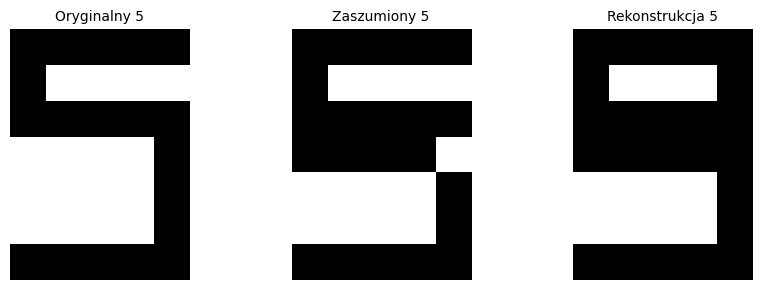

Cyfra 5: Podobieństwo rekonstrukcji = 85.71%
----------------------------------------


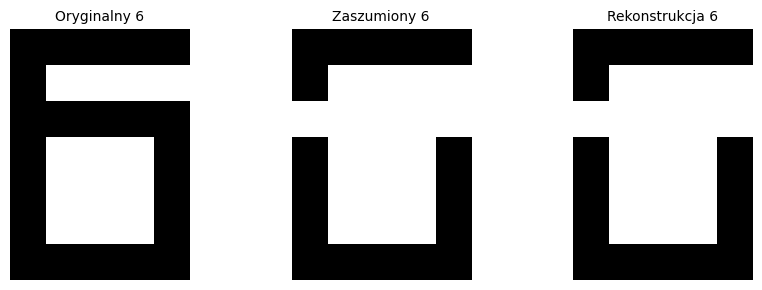

Cyfra 6: Podobieństwo rekonstrukcji = 85.71%
----------------------------------------


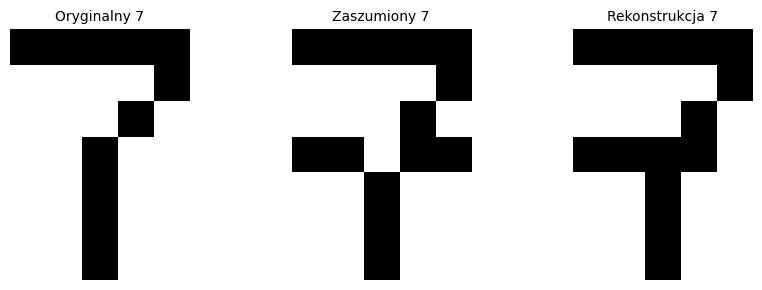

Cyfra 7: Podobieństwo rekonstrukcji = 91.43%
----------------------------------------


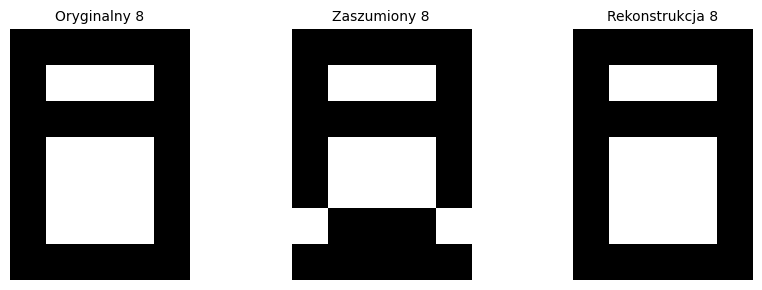

Cyfra 8: Podobieństwo rekonstrukcji = 100.00%
----------------------------------------


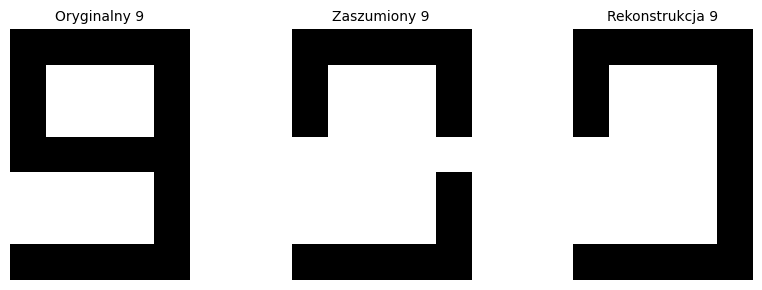

Cyfra 9: Podobieństwo rekonstrukcji = 88.57%
----------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_row(patterns, titles, rows=7, cols=5):
    """
    Wyświetla wzorce w jednej linii (rząd) z podpisami.
    :param patterns: Lista wzorców do wizualizacji.
    :param titles: Lista tytułów dla każdego wzorca.
    :param rows: Liczba wierszy w pojedynczym wzorcu.
    :param cols: Liczba kolumn w pojedynczym wzorcu.
    """
    num_patterns = len(patterns)
    fig, axes = plt.subplots(1, num_patterns, figsize=(num_patterns * 3, 3))

    if num_patterns == 1:
        axes = [axes]  # Obsługa przypadku pojedynczego obrazu

    for i, (pattern, title) in enumerate(zip(patterns, titles)):
        pattern_display = pattern.reshape(rows, cols)
        axes[i].imshow(pattern_display, cmap='binary')
        axes[i].set_title(title, fontsize=10)
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Testowanie sieci Hopfielda dla cyfr
print("Testowanie sieci Hopfielda dla cyfr:")

for i, (pattern, label) in enumerate(zip(patterns, labels)):
    # Dodanie małego szumu
    noisy_pattern = pattern.copy()
    num_noise = len(pattern) // 5  # Zaszumienie 10% neuronów
    noise_indices = np.random.choice(len(pattern), num_noise, replace=False)
    noisy_pattern[noise_indices] *= -1
    # Dodanie szumu poprzez zamianę wartości na losowe (np. -1 lub 1)
    #noisy_pattern[noise_indices] = np.random.choice([-1, 1], num_noise)
    # Rekonstrukcja
    reconstructed = network.update_synchroniczny(noisy_pattern)

    # Wizualizacja trzech obrazów w jednym rzędzie
    visualize_row(
        [pattern, noisy_pattern, reconstructed],
        [f'Oryginalny {label}', f'Zaszumiony {label}', f'Rekonstrukcja {label}'],
        rows=7, cols=5
    )

    # Porównanie podobieństwa
    similarity = np.mean(reconstructed == pattern)
    print(f"Cyfra {label}: Podobieństwo rekonstrukcji = {similarity*100:.2f}%")
    print("-" * 40)
